In [1]:
# 손실함수(=비용함수)
# 평균제곱오차

import numpy as np

def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2) # class가 2개라고 설정한 거라서 0.5

t = np.array([0,0,1,0,0,0,0,0,0,0]) # 실제값
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]) # 출력값
print(mean_squared_error(y,t))

0.09750000000000003


In [2]:
y = np.array([0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0])
print(mean_squared_error(y,t))

0.5975


In [3]:
# 크로스엔트로피 오차

# 엔트로피 : 정보를 최적으로 인코딩하기 위해 필요한 비트수
# 정답 레이블이 2, 신경망의 출력 결과가 0.6이라면 교차엔트로피오차는 -log0.6=0.51이 됨
# 정답일 때의 출력으로 전체 값이 결정됨
# 연산속도가 평균제곱오차보다 빨라서 이걸 더 많이 사용

In [4]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
print(mean_squared_error(y,t))

0.09750000000000003


In [5]:
# 미분

In [6]:
def numerical_diff(f,x):
    h = 1e-4 # 0이 되지 않게 만들어주는 아주 작은 수
    return (f(x+h)-f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

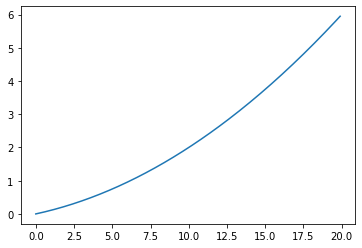

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

X = np.arange(0.0, 20.0, 0.1)
y = function_1(X)
plt.plot(X,y)
plt.show()

In [8]:
# 미분값

print(numerical_diff(function_1,1)) # x가 1일 때
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.11999999999998123
0.1999999999990898
0.2999999999986347


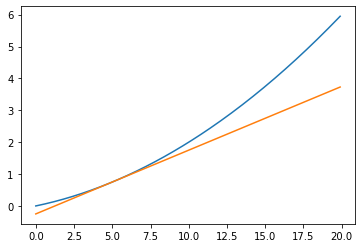

In [9]:
import numpy as np

def tangent_line(f,x):
    d = numerical_diff(f,x)
    y = f(x) - d*x
    return lambda t: d*t + y

X = np.arange(0.0, 20.0, 0.1)
y = function_1(X)

tf = tangent_line(function_1,5)
y2 = tf(X)

plt.plot(X,y)
plt.plot(X,y2) # x가 5일 때
plt.show()

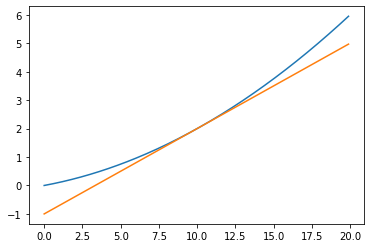

In [10]:
tf = tangent_line(function_1,10)
y2 = tf(X)

plt.plot(X,y)
plt.plot(X,y2)
plt.show()

# 경사하강법 : 기울기를 조금씩 변화시켜 가면서 가장 손실률(오차)이 낮은 값을 찾는 방법
# 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
# 갱신하는 양을 학습률이라고 함